## Time to get you hands dirty!  Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

In [5]:
from scipy.stats import norm
import scipy
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,5]

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.
- Plot each of the individual likelihoods separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$).
- Just read off the maximum likelihood solution 
- Compare it with the MLE estimator derived above

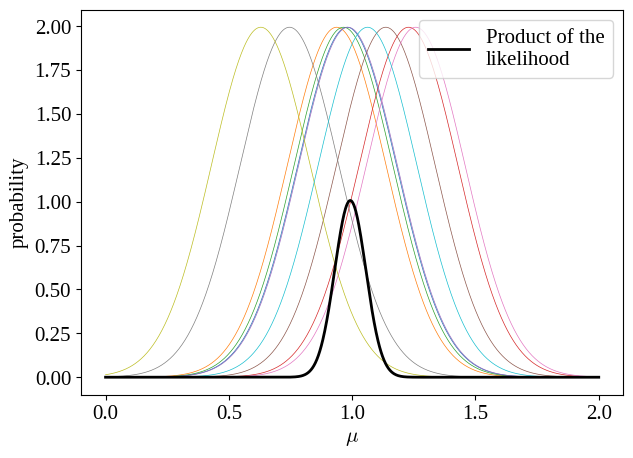

maximum of the likelihood:  0.99299
mean of the positions:  0.99245


In [44]:
N=10 #number of measurements

#parameters of the gaussian distribution
mu=1
sigma=0.2

#generate the data
x = rnd.normal(loc=mu, scale=sigma, size=N)

x_grid=np.linspace(0,2,1000)

product=1
normaliz=1

#compute the single distributions and the product of the likelihood
for i in range(N):
    gauss = scipy.stats.norm(loc=x[i],scale=sigma)

    plt.plot(x_grid,gauss.pdf(x_grid), lw=0.5)
    product*=gauss.pdf(x_grid)
    normaliz*=gauss.pdf(1)

plt.plot(x_grid, product/normaliz, lw=2, color="black", label="Product of the\nlikelihood")
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.show()

#find the maximum of the likelihood
sort_index=np.argsort(product)
max_index=sort_index[-1]

#and compare the maximum of the likelihood with the estimator given by the mean of the data
print("maximum of the likelihood: ", round(x_grid[max_index],5))
ML_est=np.mean(x)
print("mean of the positions: ", round(ML_est,5))

### Part 2

Check the Fisher matrix error estimate makes sense
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.
- Compare with the Fisher matrix error derived above
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees)

In [45]:
#compute the second order differentiation of the log-likelihood
log_l_ii=np.diff(np.log(product), n=2)
err_mu=-(log_l_ii/(x_grid[1]-x_grid[0])**2)
err_mu=1/(np.sqrt(err_mu[0]))

print("the error given by the fisher matrix is: ", round(err_mu,5))
ML_est_sigma=sigma/np.sqrt(N)
print("the error estimated cosidering homoscedastic gaussian is: ", round(ML_est_sigma,5))

the error given by the fisher matrix is:  0.06325
the error estimated cosidering homoscedastic gaussian is:  0.06325


Compare the two results obtained

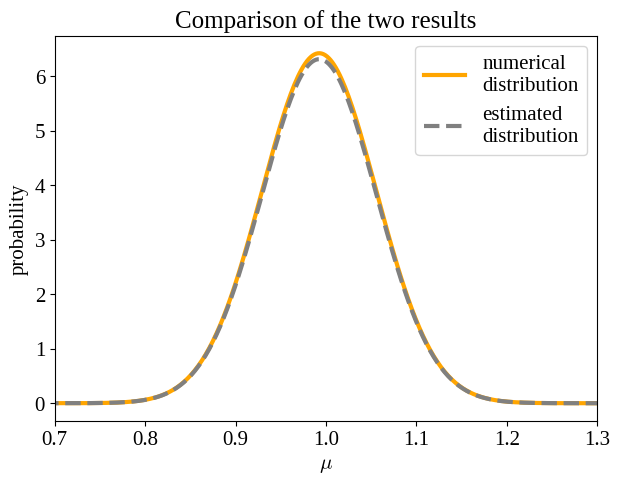

In [61]:
res_gauss = scipy.stats.norm(loc=ML_est, scale=ML_est_sigma)

plt.plot(x_grid, product*0.5, label="numerical\ndistribution", lw=3, color="orange")
plt.plot(x_grid,res_gauss.pdf(x_grid), label="estimated\ndistribution", lw=3, ls="--", color="grey")
plt.xlim(0.7,1.3)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.title('Comparison of the two results')
plt.show()

### Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

- Generalize your code from above to this case

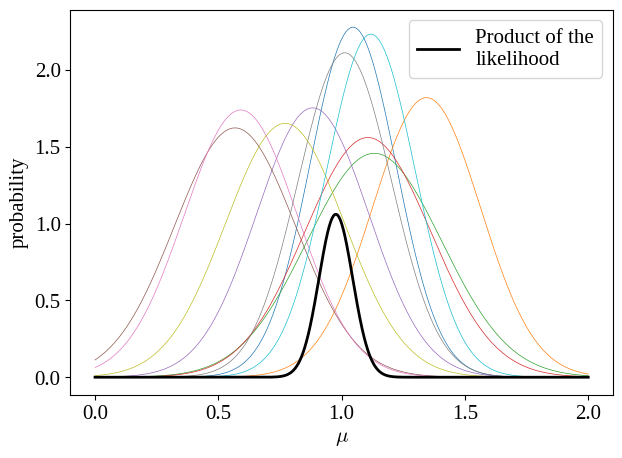

maximum of the likelihood:  0.97698
mean of the positions:  0.97644


In [41]:
N=10 #number of measurements

#parameters of the gaussian distribution
mu=1
sigma=rnd.normal(loc=0.2, scale=0.05, size=N)

x_grid=np.linspace(0,2,1000)

#generate the data

product=1
normaliz=1
ML_sum=0
err_sum=0

#compute the single distributions and the product of the likelihood
for i in range(N):
    x=rnd.normal(loc=mu, scale=sigma[i], size=1)
    gauss = scipy.stats.norm(loc=x, scale=sigma[i])

    plt.plot(x_grid,gauss.pdf(x_grid), lw=0.5)
    product*=gauss.pdf(x_grid)
    normaliz*=gauss.pdf(1)
    ML_sum+=x/sigma[i]**2
    err_sum+=1/sigma[i]**2

plt.plot(x_grid, product/normaliz, lw=2, color="black", label="Product of the\nlikelihood")
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.show()

#find the maximum of the likelihood
sort_index=np.argsort(product)
max_index=sort_index[-1]

#and compare the maximum of the likelihood with the estimator given by the mean of the data
print("maximum of the likelihood: ", round(x_grid[max_index],5))
ML_est=ML_sum/err_sum
print("mean of the positions: ", round(ML_est[0],5))

In [43]:
#compute the second order differentiation of the log-likelihood
log_l_ii=np.diff(np.log(product), n=2)
err_mu=-(log_l_ii/(x_grid[1]-x_grid[0])**2)
err_mu=1/(np.sqrt(err_mu[0]))

print("the error given by the fisher matrix is: ", round(err_mu,5))
ML_est_sigma=(err_sum)**-0.5
print("the error estimated cosidering heteroscedastic gaussian is: ", round(ML_est_sigma,5))

the error given by the fisher matrix is:  0.06841
the error estimated cosidering heteroscedastic gaussian is:  0.06841


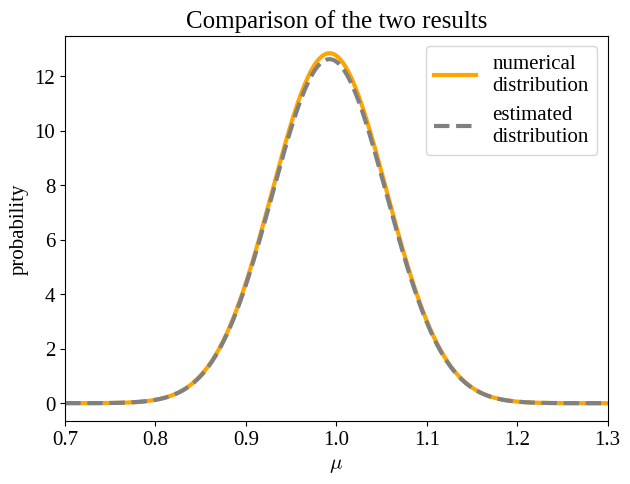

In [62]:
#compare the two results obtained
res_gauss = scipy.stats.norm(loc=ML_est, scale=ML_est_sigma)

plt.plot(x_grid, product*1, label="numerical\ndistribution", lw=3, color="orange")
plt.plot(x_grid, res_gauss.pdf(x_grid)*2, label="estimated\ndistribution", lw=3, ls="--", color="grey")
plt.xlim(0.7,1.3)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('probability')
plt.title('Comparison of the two results')
plt.show()